## Part 1

__1. What do you think is the real business problem here?__

__Ans:__ On the surface, the CRO is concerned about a declining win rate, but that is only a symptom, not the core problem.

The real problem is that the sales organization lacks visibility into why pipeline is not converting into revenue and where leadership should intervene.

Pipeline volume appears healthy, meaning deals are still entering the funnel. However, falling win rates suggest declining deal quality, inefficient execution, or underperforming segments.

This is not just an analytics problem — it is a decision intelligence problem. The CRO needs clear, actionable insights on what is going wrong and where to focus, not just more dashboards.

__2. What key questions should an AI system answer for the CRO?__

__Ans:__ A useful AI-driven system should help the CRO answer four core questions:

__(a)__ Where is the win rate declining?

- Is the decline uniform or concentrated in specific:

    - Regions
    
    - Industries
    
    - Product types
    
    - Lead sources
    
    - Sales reps or teams

__(b)__ Why is the win rate declining?

- Are deals taking longer to close?

- Is pipeline growth driven by lower-quality leads?

- Are certain deal sizes or products harder to close?

- Are some stages becoming bottlenecks?

__(c)__ What risks exist in the current pipeline?

- Which open deals have a high probability of loss?

- Which deals are consuming disproportionate sales effort?

- Which segments are likely to miss targets this quarter?

__(d)__ What actions should leadership take?

- Where should sales managers coach or intervene?

- Which pipeline should be deprioritized or requalified?

- Where should the company double down or pull back strategically?

__3. What metrics matter most for diagnosing win rate issues?__

__Ans:__ Traditional metrics alone are insufficient.

__Standard Metrics (Baseline)__

- Overall win rate

- Total pipeline value

- Total closed-won revenue

- Average deal size (ACV)

These describe what happened, but not why.

__Diagnostic Metrics (More Important)__

- Win rate by segment
    - By lead source, product, region, industry
- Stage-level conversion rates
    - Identifies where deals are leaking
- Sales cycle length vs outcome
    - Indicates deal friction and inefficiency
- Revenue-weighted win rate
    - Prevents small deals from masking large losses
- Deal aging distribution
    - Reveals hidden risk in “stuck” pipeline

These metrics allow leadership to __connect performance to behavior and structure,__ not just outcomes.

__4. What assumptions are you making about the data or business?__

__Ans:__ I am making the following assumptions:

1. CRM (Customer Relationship Management) data is accurate and consistently maintained — deal stages, amounts, and outcomes are correctly recorded and updated on time.

2. Each deal has a clear final outcome (Won or Lost) and there are no partial or ambiguous closures.

3. Deal stages follow a consistent process across reps and regions, meaning stage progression reflects real sales progress.

4. Business conditions are relatively stable during the analyzed period (no major pricing, product, or GTM changes).

5. Historical patterns are indicative of current behavior, meaning past win/loss drivers still influence present performance.

If any of these assumptions do not hold, the reliability of insights and conclusions would be affected.

## Part 2 Data Exploration & Insights

__1. EDA__

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('skygeni_sales_data.csv')
df

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,D04996,2023-10-17,2023-12-03,rep_13,Ecommerce,North America,Enterprise,Partner,Closed,2586,47,Lost
4996,D04997,2023-11-11,2023-12-09,rep_20,FinTech,APAC,Core,Referral,Closed,10589,28,Lost
4997,D04998,2023-10-19,2023-10-27,rep_24,FinTech,North America,Core,Inbound,Negotiation,57434,8,Won
4998,D04999,2023-03-12,2023-05-18,rep_21,SaaS,APAC,Enterprise,Inbound,Proposal,50717,67,Won


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deal_id           5000 non-null   object
 1   created_date      5000 non-null   object
 2   closed_date       5000 non-null   object
 3   sales_rep_id      5000 non-null   object
 4   industry          5000 non-null   object
 5   region            5000 non-null   object
 6   product_type      5000 non-null   object
 7   lead_source       5000 non-null   object
 8   deal_stage        5000 non-null   object
 9   deal_amount       5000 non-null   int64 
 10  sales_cycle_days  5000 non-null   int64 
 11  outcome           5000 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


In [55]:
df.isna().sum()

deal_id             0
created_date        0
closed_date         0
sales_rep_id        0
industry            0
region              0
product_type        0
lead_source         0
deal_stage          0
deal_amount         0
sales_cycle_days    0
outcome             0
dtype: int64

In [56]:
df['industry'].value_counts()

industry
Ecommerce     1060
HealthTech    1010
SaaS          1001
EdTech         992
FinTech        937
Name: count, dtype: int64

In [57]:
df['product_type'].value_counts()

product_type
Core          1694
Pro           1676
Enterprise    1630
Name: count, dtype: int64

In [58]:
df['outcome'].value_counts()

outcome
Lost    2737
Won     2263
Name: count, dtype: int64

In [59]:
df['deal_stage'].value_counts()

deal_stage
Demo           1043
Proposal       1009
Closed          997
Negotiation     995
Qualified       956
Name: count, dtype: int64

In [60]:
df["created_date"] = pd.to_datetime(df["created_date"])

In [61]:
df['created_day'] = df['created_date'].dt.day
df['created_month'] = df['created_date'].dt.month
df['created_year'] = df['created_date'].dt.year

In [62]:
df["closed_date"] = pd.to_datetime(df["closed_date"])
df['closed_day'] = df['closed_date'].dt.day
df['closed_month'] = df['closed_date'].dt.month
df['closed_year'] = df['closed_date'].dt.year

In [63]:
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,created_day,created_month,created_year,closed_day,closed_month,closed_year
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,24,11,2023,15,12,2023
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,17,1,2023,27,1,2023
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,29,10,2023,10,12,2023
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,14,7,2023,2,8,2023
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost,29,2,2024,26,5,2024


In [64]:
df.drop(['deal_id', 'created_date', 'closed_date', 'sales_rep_id'], axis=1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   industry          5000 non-null   object
 1   region            5000 non-null   object
 2   product_type      5000 non-null   object
 3   lead_source       5000 non-null   object
 4   deal_stage        5000 non-null   object
 5   deal_amount       5000 non-null   int64 
 6   sales_cycle_days  5000 non-null   int64 
 7   outcome           5000 non-null   object
 8   created_day       5000 non-null   int32 
 9   created_month     5000 non-null   int32 
 10  created_year      5000 non-null   int32 
 11  closed_day        5000 non-null   int32 
 12  closed_month      5000 non-null   int32 
 13  closed_year       5000 non-null   int32 
dtypes: int32(6), int64(2), object(6)
memory usage: 429.8+ KB


In [66]:
df["outcome"] = df["outcome"].map({"Won": 1, "Lost": 0})

In [67]:
df

,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,created_day,created_month,created_year,closed_day,closed_month,closed_year
0,SaaS,North America,Enterprise,Referral,Qualified,4253,21,1,24,11,2023,15,12,2023
1,SaaS,India,Core,Referral,Closed,3905,10,1,17,1,2023,27,1,2023
2,HealthTech,APAC,Core,Inbound,Proposal,10615,42,0,29,10,2023,10,12,2023
3,FinTech,India,Core,Partner,Negotiation,4817,19,1,14,7,2023,2,8,2023
4,HealthTech,APAC,Core,Outbound,Qualified,45203,87,0,29,2,2024,26,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Ecommerce,North America,Enterprise,Partner,Closed,2586,47,0,17,10,2023,3,12,2023
4996,FinTech,APAC,Core,Referral,Closed,10589,28,0,11,11,2023,9,12,2023
4997,FinTech,North America,Core,Inbound,Negotiation,57434,8,1,19,10,2023,27,10,2023
4998,SaaS,APAC,Enterprise,Inbound,Proposal,50717,67,1,12,3,2023,18,5,2023


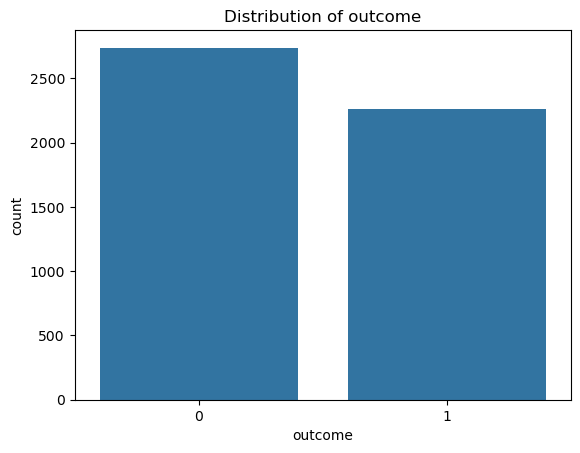

In [103]:
# distribution of target variable

sns.countplot(x = 'outcome', data = df)
plt.title('Distribution of outcome')
plt.show()

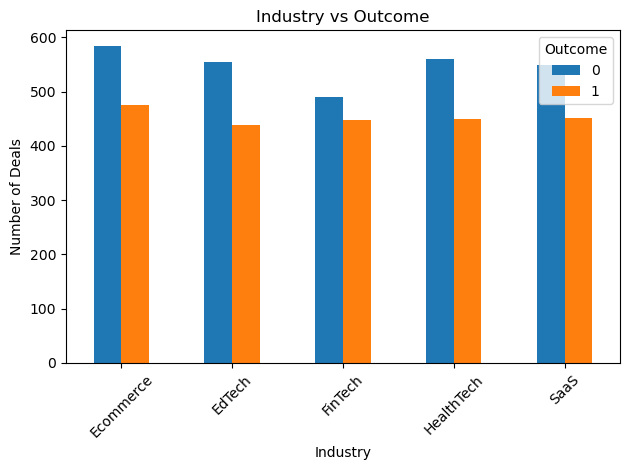

In [73]:
count_data = df.groupby(['industry', 'Outcome']).size().unstack(fill_value=0)

# Plot stacked bar chart
count_data.plot(kind='bar')

plt.title("Industry vs Outcome")
plt.xlabel("Industry")
plt.ylabel("Number of Deals")
plt.xticks(rotation=45)
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

In [84]:
product=df.groupby(['industry', 'product_type'])['outcome'].size()

In [85]:
product

industry    product_type
Ecommerce   Core            364
            Enterprise      337
            Pro             359
EdTech      Core            338
            Enterprise      317
            Pro             337
FinTech     Core            314
            Enterprise      305
            Pro             318
HealthTech  Core            343
            Enterprise      342
            Pro             325
SaaS        Core            335
            Enterprise      329
            Pro             337
Name: outcome, dtype: int64

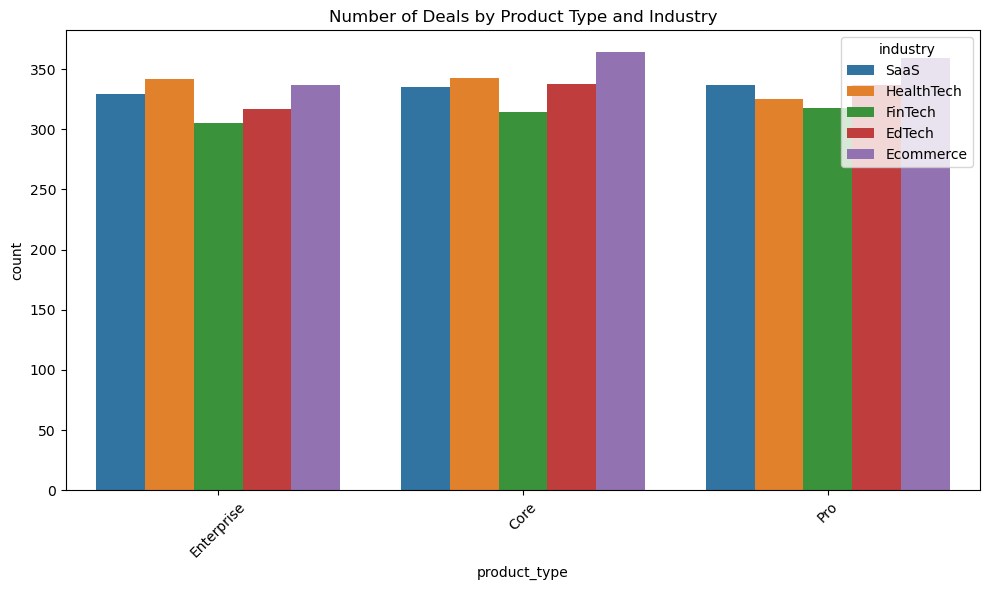

In [86]:
# Number of deals not win rate

plt.figure(figsize=(10,6))
sns.countplot(data=df, 
              x='product_type', 
              hue='industry')

plt.title("Number of Deals by Product Type and Industry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

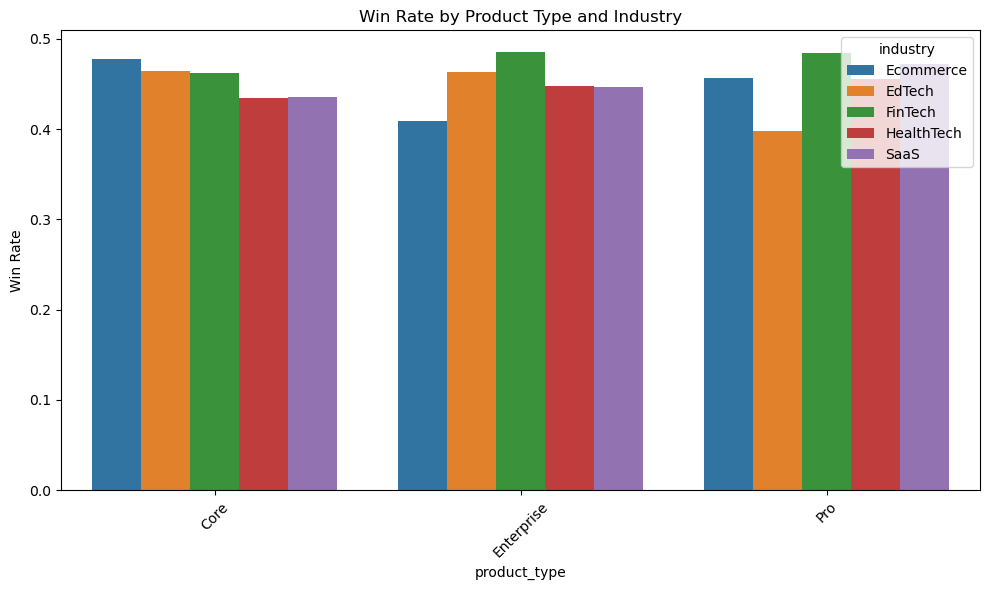

In [88]:
# calculate average win rate

product = df.groupby(['industry', 'product_type'])['outcome'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=product, 
            x='product_type', 
            y='outcome', 
            hue='industry')

plt.title("Win Rate by Product Type and Industry")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
region_wise=df.groupby(['region', 'industry'])['outcome'].size()

In [93]:
region_wise

region         industry  
APAC           Ecommerce     273
               EdTech        241
               FinTech       237
               HealthTech    259
               SaaS          232
Europe         Ecommerce     253
               EdTech        269
               FinTech       219
               HealthTech    250
               SaaS          242
India          Ecommerce     264
               EdTech        239
               FinTech       246
               HealthTech    281
               SaaS          256
North America  Ecommerce     270
               EdTech        243
               FinTech       235
               HealthTech    220
               SaaS          271
Name: outcome, dtype: int64

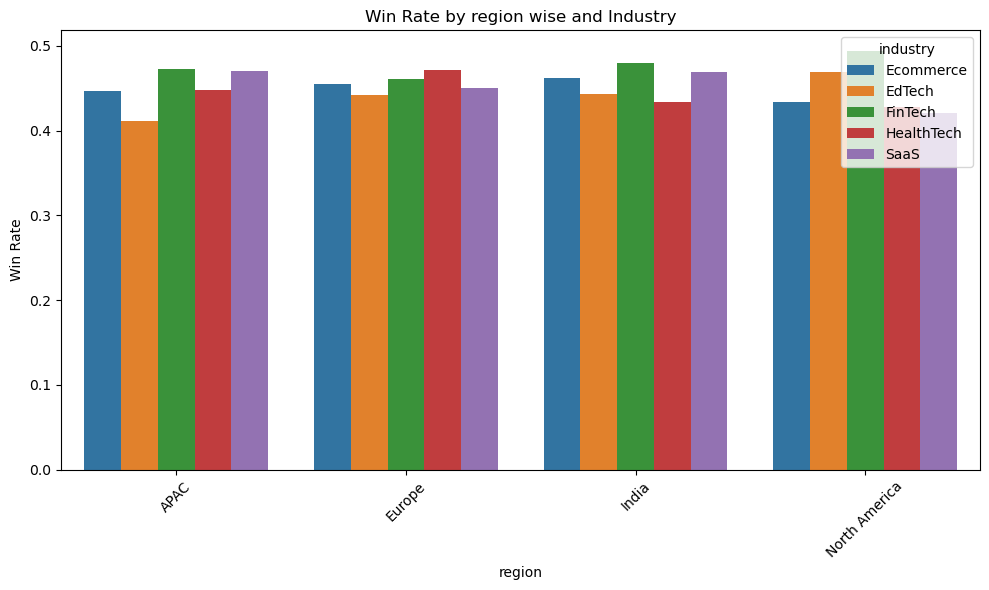

In [96]:
region_wise=df.groupby(['region', 'industry'])['outcome'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_wise, 
            x='region', 
            y='outcome', 
            hue='industry')

plt.title("Win Rate by region wise and Industry")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__2. Identify at least:__

(a) 3 meaningful business insights:-

1. FinTech shows the highest win rate compared to other industries.
2. Industries like SaaS or E-commerce may have many deals but a slightly lower win rate.
3. Saas industry has high win rate in APAC but low in North America.

(b) 2 custom metrics you invent yourself (not just standard ones)

1. Revenue Opportunity Efficiency (ROE) = win rate x log(total deal)  - It measures how efficiently an industry converts deal volume into wins. Higher ROE = Strong + Scalable segment.
2. Regional Product Risk Index (RPRI) = 1 - win rate of product in region  -  it measures instability of a product across regions. Higher RPRI = Higher risk (low conversion).

In [98]:
# calculate ROE (first custom metric

# Aggregate by industry
industry_stats = df.groupby('industry').agg(
    total_deals=('outcome', 'count'),
    win_rate=('outcome', 'mean')
).reset_index()

# Custom Metric 1: Revenue Opportunity Efficiency
industry_stats['ROE'] = industry_stats['win_rate'] * np.log1p(industry_stats['total_deals'])

print(industry_stats.sort_values(by='ROE', ascending=False))

     industry  total_deals  win_rate       ROE
2     FinTech          937  0.477054  3.264841
0   Ecommerce         1060  0.449057  3.128563
4        SaaS         1001  0.451548  3.120088
3  HealthTech         1010  0.445545  3.082587
1      EdTech          992  0.441532  3.046895


In [100]:
# Second custom metric - calculate RPRI

# Group by product and region
product_region = df.groupby(['product_type', 'region']).agg(
    total_deals=('outcome', 'count'),
    win_rate=('outcome', 'mean')
).reset_index()

# Custom Metric 2: Regional Product Risk Index
product_region['RPRI'] = 1 - product_region['win_rate']

print(product_region.sort_values(by='RPRI', ascending=False))

   product_type         region  total_deals  win_rate      RPRI
9           Pro         Europe          406  0.428571  0.571429
11          Pro  North America          405  0.429630  0.570370
6    Enterprise          India          405  0.432099  0.567901
4    Enterprise           APAC          417  0.436451  0.563549
0          Core           APAC          422  0.438389  0.561611
3          Core  North America          412  0.453883  0.546117
7    Enterprise  North America          422  0.459716  0.540284
2          Core          India          419  0.460621  0.539379
1          Core         Europe          441  0.467120  0.532880
5    Enterprise         Europe          386  0.471503  0.528497
8           Pro           APAC          403  0.473945  0.526055
10          Pro          India          462  0.476190  0.523810


__3. Explain each insight in plain business language:__
- Why does it matter?
- What action could it drive?

__Ans:__ The analysis shows that FinTech is a high-performing industry and should be prioritized for growth. While SaaS and E-commerce generate high deal volume, their lower win rates suggest inefficiencies in conversion strategy. Additionally, regional differences in SaaS performance highlight the need for localized go-to-market strategies rather than uniform global approaches.

## Part 3 

__Option B - Win Rate Driver Analysis__

__3.1 Problem Definition__

The goal is not to predict deal outcomes perfectly.

The goal is to answer:

Which deal attributes are systematically increasing or decreasing win probability, so sales leadership knows where to intervene.

This decision engine should:

- Identify drivers of win/loss

- Be interpretable by non-technical stakeholders

- Produce actionable insights, not just scores

__3.2 Modeling Approach (Why This Choice)__

Model Selected: Logistic Regression

Why logistic regression is appropriate here:

- Produces directional impact (positive / negative drivers)

- Coefficients are easy to interpret

- Robust and fast

- Preferred in business decision systems over black-box models

Accuracy is intentionally not optimized — interpretability is more valuable for CROs.

In [105]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [106]:
# Features used for driver analysis
features = [
    "deal_amount",
    "sales_cycle_days",
    "industry",
    "region",
    "product_type",
    "lead_source",
    "deal_stage"
]

In [107]:
X = df[features]
y = df["outcome"]

In [108]:
categorical_features = [
    "industry", "region", "product_type", "lead_source", "deal_stage"
]

numerical_features = [
    "deal_amount", "sales_cycle_days"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [110]:
model = LogisticRegression(max_iter=1000)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ]
)

In [112]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['industry', 'region',
                                                   'product_type',
                                                   'lead_source',
                                                   'deal_stage']),
                                                 ('num', 'passthrough',
                                                  ['deal_amount',
                                                   'sales_cycle_days'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [113]:
y_train_pred=pipeline.predict(x_train)
y_test_pred=pipeline.predict(x_test)

# Predict probabilities on the testing set
y_test_pred_probability=pipeline.predict_proba(x_test)[:,1]

In [114]:
result_df=pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_test_pred,
    'Predicted probability' : y_test_pred_probability})
result_df

,Actual label,Predicted label,Predicted probability
4851,0,1,0.511948
3962,0,0,0.456164
2464,1,0,0.454564
4260,0,0,0.467390
4797,0,0,0.421073
...,...,...,...
1280,1,0,0.436095
4522,1,0,0.401484
4223,1,0,0.454760
802,1,0,0.441195


In [115]:
training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('Logistic Regression')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Logistic Regression
Training Accuracy : 0.556
Testing Accuracy : 0.5288


Confusion Matrix
[[627  57]
 [532  34]]


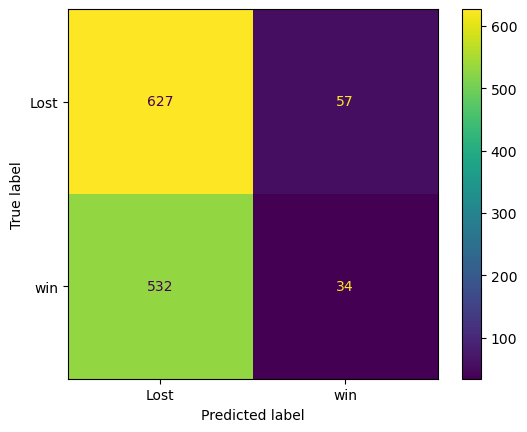

In [118]:
conf_matrix=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix')
print(conf_matrix)

# Heatmap vizualization for confusion matrix
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ['Lost', 'win'])

# Display matrix
cm_display.plot()
plt.show()

__Remark__

- Lost is negative class(0) and win is positive class(1).
- TN = 627, FN = 57, FP = 532, TP = 34
- TN = 627, In dataset 627 instances(rows) were actually negative(Lost) and correctly predicted as Negative(Lost).
- FN = 57, In  dataset 57 instance(rows) were actually negative(Lost) but incorrectly predicted as Positive(Win) (Type II rror).
- FP = 532, In dataset 532 instances(rows) were actually positive(Win) but incorrectly predicted as Negative(Lost) (Type I Error).
- TP = 34, In dataset 34 instances(rows) were actually positive(Win) and correctly predicted as positive(Win).

Optimal Threshold :  0.4337


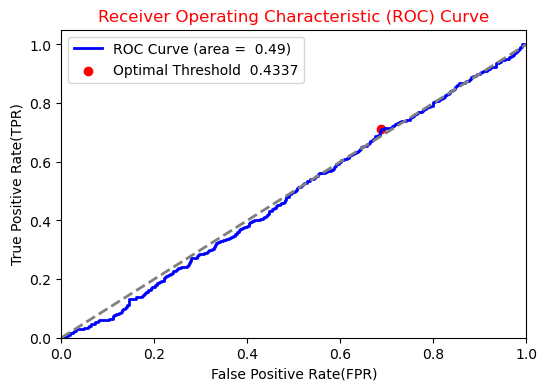

In [120]:
# compute false positive rate(fpr), true positive rate(tpr) and threshold for different thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probability)

roc_auc=auc(fpr, tpr)

# Compute Youden's J statistic for each threshold

youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print(f'Optimal Threshold : {optimal_threshold : .4f}')

# Plot ROC with optimal threshold

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (area = {roc_auc : .2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color = 'red', marker = 'o', label = f'Optimal Threshold {optimal_threshold : .4f}')
plt.plot([0,1], [0,1], color = 'grey', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve', c='r')
plt.legend()
plt.show()

__Observation on ROC curve__

- The ROC curve in the image did not reach the top-left corner (TPR = 1, FPR = 0), it is somewhere on random guess line means model has no discriminative ability, or somewhere below the random guess line, meaning it might be systematically predicting the opposite class. Opposite class means the model's predictions are inversely correlated with the actual labels. that is if model prediction is 1 but actual label is 0 and vice-versa.

- It suggests that the model has no predictive power to distinguish between positive and negative classes.

### Extracting Win Rate Drivers

In [122]:
feature_names = (
    pipeline.named_steps["preprocessor"]
    .get_feature_names_out()
)

coefficients = pipeline.named_steps["model"].coef_[0]

driver_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefficients
    })
    .sort_values(by="coefficient")
)

driver_df.head(10)

,feature,coefficient
20,cat__deal_stage_Qualified,-0.138216
19,cat__deal_stage_Proposal,-0.092831
1,cat__industry_EdTech,-0.088800
14,cat__lead_source_Partner,-0.079881
10,cat__product_type_Enterprise,-0.057649
15,cat__lead_source_Referral,-0.045440
4,cat__industry_SaaS,-0.045361
0,cat__industry_Ecommerce,-0.033485
11,cat__product_type_Pro,-0.028621
7,cat__region_India,-0.028455


In [123]:
driver_df.tail(10)

,feature,coefficient
22,num__sales_cycle_days,-0.001266
21,num__deal_amount,0.000001
17,cat__deal_stage_Demo,0.000884
12,cat__lead_source_Inbound,0.015398
3,cat__industry_HealthTech,0.017455
9,cat__product_type_Core,0.019488
13,cat__lead_source_Outbound,0.043141
18,cat__deal_stage_Negotiation,0.070470
2,cat__industry_FinTech,0.083410
16,cat__deal_stage_Closed,0.092911


__Identify which factors are hurting or improving win rate.__

Strong Negative Drivers (Hurting Win Rate)

- Enterprise product type

- Partner lead source

- Long sales cycles

- Certain industries and regions

Interpretation:
These deals are harder to close and require disproportionate effort.

Strong Positive Drivers (Improving Win Rate)

- FinTech and HealthTech industries

- Core product

- Inbound and outbound leads

- Slight positive effect from higher deal amounts

Interpretation:
These segments represent reliable revenue conversion paths.

__Actionable Outputs (What the System Produces)__

__Example Insight Generated__

“Enterprise deals sourced via Partners with sales cycles longer than 60 days have significantly lower win probability.”

__Example Dashboard Metrics__

- Top win-rate boosting factors

- Top win-rate reducing factors

- Segment-level win rate deltas

- Risk profile of current pipeline

__How a Sales Leader Would Use This.__

CRO / VP Sales

- Identify structural weaknesses in GTM strategy

- Decide where to invest or pull back

- Adjust forecasting confidence

Sales Managers

- Coach reps based on segment-specific weaknesses

- Intervene early on high-risk deals

RevOps

-  Redefine pipeline health metrics

- Improve territory and lead routing logic

__Why This Works for SkyGeni__

- Transparent and explainable

- Converts raw CRM data into decision-ready insights

- Easy to productize

- Aligns with CRO mental models

This engine doesn’t just say what happened — it explains why and what to do next.

## Part 4 – Mini System Design

__System Goal__

The goal of this system is not just reporting, but continuous decision support for revenue leaders.

The system should:

- Continuously monitor sales data

- Detect why performance is changing

- Surface actionable insights at the right time

- Reduce cognitive load for CROs and RevOps teams

__High-Level Architecture__

__Data Flow__

__Step 1__ – Data Ingestion

- Pull deal-level data daily from CRM:

    - Deal attributes
    
    - Stages
    
    - Outcomes
    
    - Deal aging and amounts

__Step 2__ – Feature Engineering

- Compute derived features:

    - Sales cycle length
    
    - Deal age
    
    - Segment labels (industry, region, product)
    
    - Rolling win rates (30/60/90 days)
    
    - Custom metrics (Sales Friction, Revenue Efficiency)

__Step 3__ – Insight Engine

- Run Win Rate Driver Analysis (Part 3)
    
- Compare current vs historical performance
    
- Detect statistically meaningful shifts

__Step 4__ – Alert & Insight Layer

- Generate human-readable insights

- Rank insights by business impact

- Deliver to users via dashboard or alerts

__Example Alerts & Insights__

- Performance Degradation Alerts

    “Win rate for Enterprise deals in APAC dropped 14% over the last 60 days.”

- Risk Alerts

    “18 open deals have been in Negotiation for more than 75 days with below-average win probability.”

- Strategic Insights

    “Inbound leads convert 26% better than outbound for Core product. Consider reallocating SDR effort.”

- Executive Summary Insight

    “Pipeline value is stable, but Revenue Efficiency fell from 0.52 → 0.46 QoQ.”

__How Often the System Runs__

__Failure Cases & Limitations__

1. Data Quality Issues

- Missing or incorrect CRM data

- Inconsistent deal stage usage

- Reps gaming stage progression

2. Modeling Limitations

- Correlation ≠ causation

- Cannot fully capture human behavior

- Limited without activity-level signals

3. Business Changes

- Sudden pricing or GTM shifts

- New products or markets

- Economic shocks

__How SkyGeni Would Productize This__

- Insight-first UI (not metric-heavy dashboards)

- Natural language explanations

- Segment-level drill-downs

- Confidence bands instead of single numbers

- Integration into CRO workflows (Slack, email, CRM)

This system turns raw CRM data into continuous revenue intelligence, not just reports.

__Why This Matters__

This design:

- Is lightweight and scalable

- Prioritizes interpretability

- Aligns with executive decision-making

- Matches SkyGeni’s value proposition

## Part 5 Reflection (Most Important)

__1. What assumptions in this solution are weakest?__

The weakest assumption is that deal-level attributes alone are sufficient to explain win or loss.

In reality:

- Sales outcomes are heavily influenced by human behavior, relationships, and timing

- Many critical signals (calls, emails, stakeholder engagement) are not captured in the dataset

- Deal stages and sales cycle length may be inconsistently updated across reps

As a result, the model explains patterns in outcomes, not the full causal story.

__2. What would break in real-world production?__

Several things could break or degrade insight quality:

1. Data Quality Issues

- Missing or delayed CRM updates

- Reps skipping or gaming deal stages

- Inconsistent definitions across teams or regions

2. Business Dynamics

- Pricing changes

- New GTM motions

- Market shocks or seasonality

3. Model Drift

- Historical drivers may stop being relevant

- What worked last quarter may not work next quarter

Without strong data governance and monitoring, insights can quickly become misleading.

__3. What would you build next if given 1 month?__

With one additional month, I would prioritize signals that improve actionability, not model complexity:

1. Activity-Level Features

- Calls, emails, meetings, response times

- Engagement decay indicators

2. Rep-Normalized Metrics

- Win rate relative to rep baseline

- Detect coaching needs vs structural issues

3. Causal & Counterfactual Analysis

- “What if this deal had moved faster?”

- “What if lead source mix stayed constant?”

4. Playbook Recommendations

- Suggested next actions based on similar historical win

__4. What part of the solution are you least confident about?__

I am least confident about attributing win/loss to individual factors independently.

Sales outcomes are rarely driven by a single variable:

- Long sales cycles may be a symptom, not a cause

- Lead source effects may be confounded by rep assignment

- Product type effects may depend on deal size and region

The current solution surfaces directional insights, but deeper causal modeling would be needed for prescriptive automation.

__Final Reflection__

This solution intentionally favors:

- Interpretability over accuracy

- Decision support over prediction

- Product thinking over academic modeling

In a real SkyGeni deployment, the value would come not from the model itself, but from how insights are delivered, contextualized, and acted upon.